In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

df = pd.read_csv("datasets/wildfires_training.csv")
test_df = pd.read_csv("datasets/wildfires_test.csv")
data = df.to_numpy()
test_data = test_df.to_numpy()
scaler = StandardScaler()

X_train = scaler.fit_transform(data[:, 1:])
y_train = data[:, 0]

X_test = scaler.transform(test_data[:, 1:])
Y_test = test_data[:, 0]

num of fires in training data:  79
num of no fires in training data:  75


This is my first run of logistic regression using default params.
Solver = lbfgs (default)
C = 1.0 (default)
Note: StandardScaler also used.


In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

predicted_Y = model.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_Y)
conf_matrix = confusion_matrix(Y_test, predicted_Y)
recall = recall_score(Y_test, predicted_Y, pos_label='yes')
precision = precision_score(Y_test, predicted_Y, pos_label='yes')

I will now attempt to adjust the hyperparameters to see if I can improve the accuracy. Starting with C value.

In [38]:
model = LogisticRegression(C=10)
model.fit(X_train, y_train)

predicted_Y = model.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_Y)
conf_matrix = confusion_matrix(Y_test, predicted_Y)
recall = recall_score(Y_test, predicted_Y, pos_label='yes')
precision = precision_score(Y_test, predicted_Y, pos_label='yes')

 I will now run a script to test recall score at different C values to find the optimal.

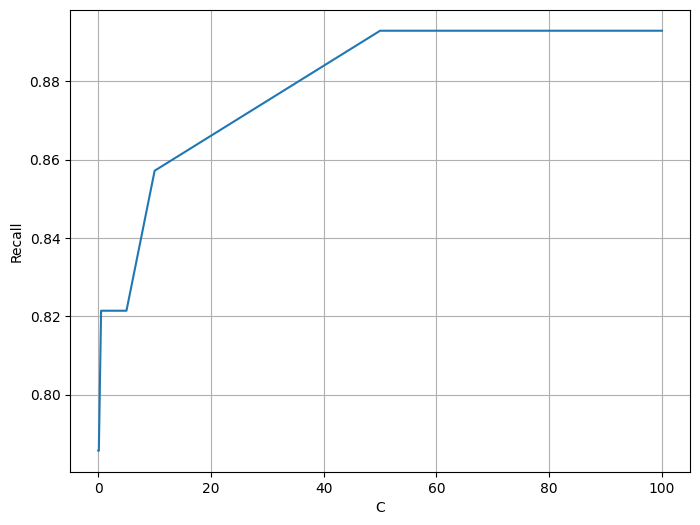

In [47]:
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
recall_results = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=200)
    model.fit(X_train, y_train)
    predicted_Y = model.predict(X_test)
    recall = recall_score(Y_test, predicted_Y, pos_label='yes')
    recall_results.append(recall)

plt.figure(figsize=(8, 5))
plt.plot(C_values, recall_results)
plt.xlabel('C')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

In [46]:
model = LogisticRegression(C=50)
model.fit(X_train, y_train)
predicted_Y = model.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_Y)
conf_matrix = confusion_matrix(Y_test, predicted_Y)
recall = recall_score(Y_test, predicted_Y, pos_label='yes')
precision = precision_score(Y_test, predicted_Y, pos_label='yes')

I will now try changing the solver type used to see the effect. I will start C at 50. Default solver is lbfgs.

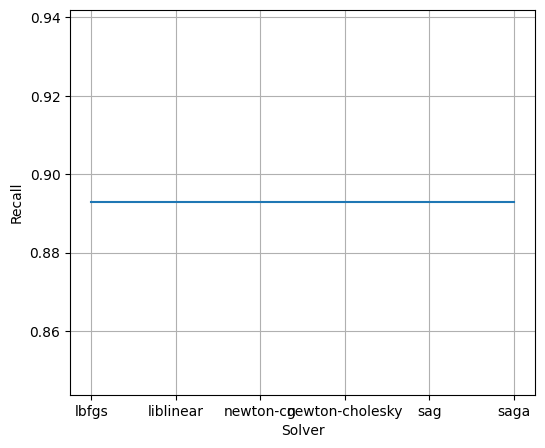

In [60]:
solver_types = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
recall_results = []

for solver in solver_types:
    model = LogisticRegression(C=50, solver=solver, max_iter=2000)
    model.fit(X_train, y_train)
    predicted_Y = model.predict(X_test)
    recall = recall_score(Y_test, predicted_Y, pos_label='yes')
    recall_results.append(recall)

plt.figure(figsize=(6, 5))
plt.plot(solver_types, recall_results)
plt.xlabel('Solver')
plt.ylabel('Recall')
plt.grid(True)
plt.show()